In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

1. Supervised Learning

In [2]:
# Linear Regression (Predicting Continuous Values)
# Used for predicting numerical values, like house prices or sales.
from sklearn.linear_model import LinearRegression

# Sample Dataset
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
y = np.array([3, 6, 9, 12, 15])

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training
model = LinearRegression()
model.fit(X_train, y_train)

# Prediction
y_pred = model.predict(X_test)

# Model Evaluation
print("Predictions:", y_pred)
print("Model Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)


Predictions: [6.]
Model Coefficients: [3.]
Model Intercept: 0.0


In [27]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

# Load the dataset
cancer = load_breast_cancer()

# Convert to DataFrame
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)

# Add target column
df['target'] = cancer.target

# Split data into features (X) and target (y)
X = df.drop(columns=['target'])  # Feature variables
y = df['target']  # Target variable

# Split data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (Logistic Regression works better with scaled data)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')  # Print accuracy

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9737
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [28]:
# Logistic Regression (Binary Classification)
# Used for problems like spam detection (Spam/Not Spam).
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris

# Load Data
iris = load_iris()
X = iris.data[:, :2]  # Taking only first two features
y = (iris.target == 0).astype(int)  # Binary classification: Class 0 vs. Others

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training
model = LogisticRegression()
model.fit(X_train, y_train)

# Prediction & Evaluation
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 1.0
[[20  0]
 [ 0 10]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [4]:
# Decision Tree Classifier
# Used for classification tasks like customer segmentation.
from sklearn.tree import DecisionTreeClassifier

# Load Data
X, y = load_iris(return_X_y=True)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Prediction & Evaluation
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 1.0


In [5]:
# Random Forest Classifier (Ensemble Learning)
# Improves decision trees by combining multiple trees.
from sklearn.ensemble import RandomForestClassifier

# Model Training
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)

# Prediction & Evaluation
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 1.0


2. Unsupervised Learning

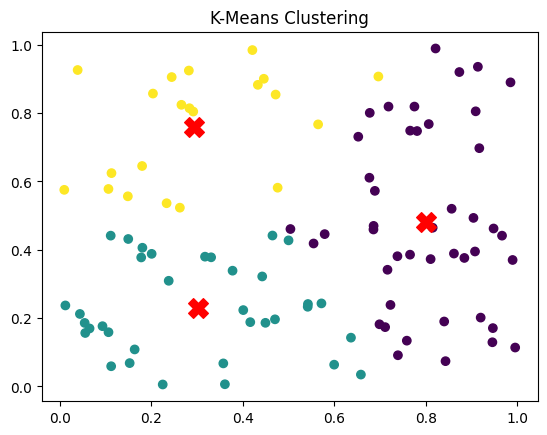

In [6]:
# K-Means Clustering
# Used for customer segmentation, anomaly detection.
from sklearn.cluster import KMeans

# Load Data
X = np.random.rand(100, 2)  # Generating 100 points with 2 features

# Model Training
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

# Plot Clusters
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, marker='X', color='red')
plt.title("K-Means Clustering")
plt.show()

In [7]:
# Principal Component Analysis (PCA)
# Used for dimensionality reduction (e.g., reducing image size while keeping key features).
from sklearn.decomposition import PCA

# Load Data
X = np.random.rand(100, 5)  # Generating 100 points with 5 features

# Applying PCA
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

print("Original Shape:", X.shape)
print("Reduced Shape:", X_reduced.shape)

Original Shape: (100, 5)
Reduced Shape: (100, 2)


3. Model Selection & Hyperparameter Tuning

In [8]:
# Cross-Validation
# from sklearn.model_selection import cross_val_score

# # 5-Fold Cross Validation
# scores = cross_val_score(RandomForestClassifier(), X, y, cv=5)
# print("Cross-Validation Scores:", scores)
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris

# Load dataset
data = load_iris()
X = data.data
y = data.target

# Ensure y is 1D
y = y.ravel()

# Perform cross-validation
scores = cross_val_score(RandomForestClassifier(), X, y, cv=5)
print("Cross-Validation Scores:", scores)

Cross-Validation Scores: [0.96666667 0.96666667 0.93333333 0.93333333 1.        ]


In [9]:
#  Grid Search for Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [10, 50, 100], 'max_depth': [None, 10, 20]}
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': 20, 'n_estimators': 50}


4. Deep Learning with Scikit-learn (MLP Classifier)

In [10]:
# A basic neural network implementation.
from sklearn.neural_network import MLPClassifier

# Model Training
model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500)
model.fit(X_train, y_train)

# Prediction & Evaluation
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 1.0
